./slurm_scripts/submit.sh  scripts/run_fineweb1B_adam_fista.sh param_configs/attn_fista_rho_mu_sweep.json small_fista  16



In [1]:
from sweep_utils import * 

In [2]:
param_configs = "../param_configs/attn_fista_rho_mu_sweep_all_fista_it.json"
script_name = "../scripts/run_fineweb1B_adam_fista.sh"
df, missing = load_sweep_jsons(param_configs, script_name)

In [3]:
df[:5]

,path,final_train_loss,min_val_loss,fin_val_loss,kq_max,kq_median,kq_mean,attn_max_iter,lr,momentum,mu_frac,rho_over_lr,warm_start
0,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.101516,4.089497,4.089497,544.00,393.0,4.054431e+02,50,0.001,False,0.5,5,False
1,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.354741,4.346509,4.346509,37.75,21.0,2.237453e+01,50,0.001,False,0.75,0.5,False
2,/mnt/home/tparshakova/Documents/GPT-opt/output...,7.878261,7.886023,7.886023,21889024.00,14745600.0,1.535444e+07,50,0.001,False,0.001,50,False
3,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.143903,4.133544,4.133544,516.00,388.0,3.939230e+02,50,0.001,False,0.1,1,False
4,/mnt/home/tparshakova/Documents/GPT-opt/output...,5.950385,5.933904,5.933904,42240.00,34048.0,2.981637e+04,50,0.001,False,0.005,0.5,False


In [4]:
sorted(df["mu_frac"].unique()), sorted(df["rho_over_lr"].unique())

(['0.001', '0.005', '0.01', '0.05', '0.1', '0.5', '0.75'],
 ['0.01', '0.1', '0.5', '1', '10', '100', '5', '50'])

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:374: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:376: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


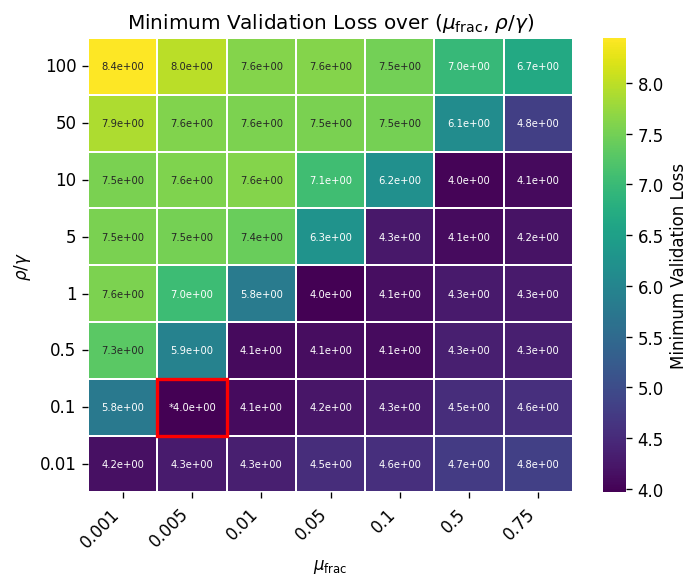

In [5]:
plot_heatmat_grid(df, value="min_val_loss")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:374: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:376: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


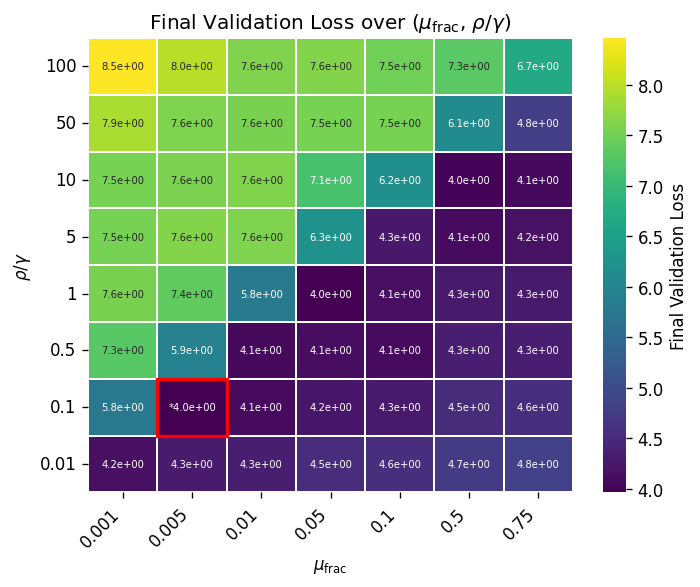

In [6]:
plot_heatmat_grid(df, value="fin_val_loss")

In [10]:
cols = ["min_val_loss", "kq_max", "mu_frac", "rho_over_lr"]
top5 = df.dropna(subset=cols).nsmallest(5, "min_val_loss")[cols].reset_index(drop=True)
print(top5)

   min_val_loss  kq_max mu_frac rho_over_lr
0      3.964075  1020.0   0.005         0.1
1      3.975584  1192.0    0.05           1
2      4.010204  1232.0     0.5          10
3      4.077322  4768.0    0.01         0.5
4      4.081542   636.0    0.75          10


/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:374: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:376: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


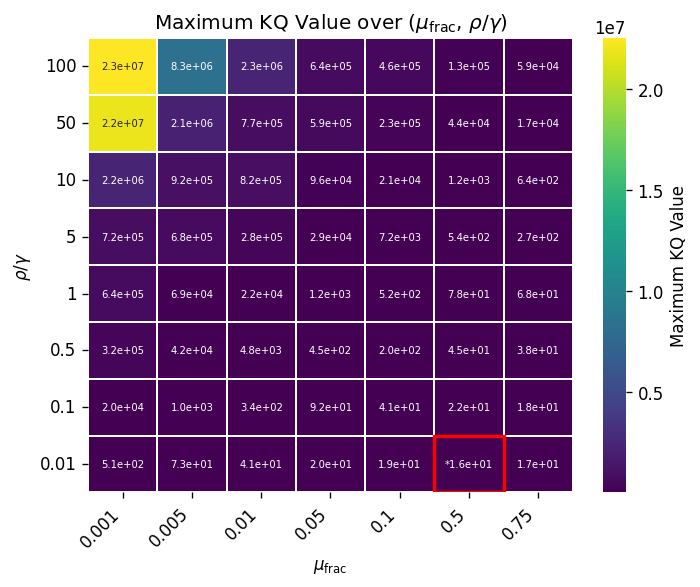

In [8]:
plot_heatmat_grid(df, value="kq_max")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:374: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:376: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


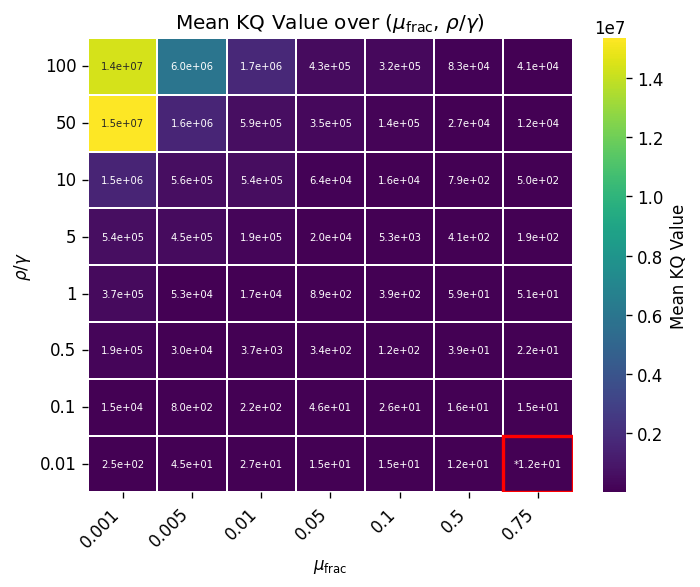

In [9]:
plot_heatmat_grid(df, value="kq_mean")